In [31]:
from keras.layers import Dense, Flatten, AveragePooling2D, Dropout
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model,load_model
from tensorflow.keras.layers import Activation,Dense, Dropout, Flatten, Conv2D, MaxPooling2D,MaxPool2D,AveragePooling2D,GlobalMaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator,array_to_img
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping,ModelCheckpoint

In [3]:
!cd '/content'
!unzip '/content/drive/My Drive/Covid19_dataset.zip'

Archive:  /content/drive/My Drive/Covid19_dataset.zip
  inflating: Covid19-dataset/test/Covid/0100.jpeg  
  inflating: Covid19-dataset/test/Covid/0102.jpeg  
  inflating: Covid19-dataset/test/Covid/0105.png  
  inflating: Covid19-dataset/test/Covid/0106.jpeg  
  inflating: Covid19-dataset/test/Covid/0108.jpeg  
  inflating: Covid19-dataset/test/Covid/0111.jpg  
  inflating: Covid19-dataset/test/Covid/0112.jpg  
  inflating: Covid19-dataset/test/Covid/0113.jpg  
  inflating: Covid19-dataset/test/Covid/0115.jpeg  
  inflating: Covid19-dataset/test/Covid/0118.jpeg  
  inflating: Covid19-dataset/test/Covid/0119.jpeg  
  inflating: Covid19-dataset/test/Covid/0120.jpg  
  inflating: Covid19-dataset/test/Covid/094.png  
  inflating: Covid19-dataset/test/Covid/096.png  
  inflating: Covid19-dataset/test/Covid/098.jpeg  
  inflating: Covid19-dataset/test/Covid/COVID-00003b.jpg  
  inflating: Covid19-dataset/test/Covid/COVID-00012.jpg  
  inflating: Covid19-dataset/test/Covid/COVID-00022.jpg  
 

In [4]:
data_path = '/content/Covid19-dataset'

In [36]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))


In [37]:
from keras.optimizers import Adam
opt=Adam(learning_rate=0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [34]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   zoom_range = 0.2,
                                   rotation_range=15,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(data_path + '/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical',
                                                 shuffle=True)

test_set = test_datagen.flow_from_directory(data_path + '/test',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical',
                                            shuffle = False)

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [40]:
history = model.fit(training_set,
                              validation_data=test_set,
                              epochs=10)

Epoch 1/10
16/16 [==============================] - 35s 2s/step - loss: 0.2401 - accuracy: 0.9323 - val_loss: 0.3476 - val_accuracy: 0.8485
Epoch 2/10
16/16 [==============================] - 35s 2s/step - loss: 0.2418 - accuracy: 0.9203 - val_loss: 0.3515 - val_accuracy: 0.8182
Epoch 3/10
16/16 [==============================] - 37s 2s/step - loss: 0.2422 - accuracy: 0.8765 - val_loss: 0.6621 - val_accuracy: 0.6970
Epoch 4/10
16/16 [==============================] - 35s 2s/step - loss: 0.2352 - accuracy: 0.9163 - val_loss: 0.3264 - val_accuracy: 0.9091
Epoch 5/10
16/16 [==============================] - 37s 2s/step - loss: 0.2385 - accuracy: 0.9323 - val_loss: 0.2666 - val_accuracy: 0.9091
Epoch 6/10
16/16 [==============================] - 35s 2s/step - loss: 0.2304 - accuracy: 0.9044 - val_loss: 0.3395 - val_accuracy: 0.9091
Epoch 7/10
16/16 [==============================] - 35s 2s/step - loss: 0.2820 - accuracy: 0.8845 - val_loss: 0.3382 - val_accuracy: 0.8788
Epoch 8/10
16/16 [==

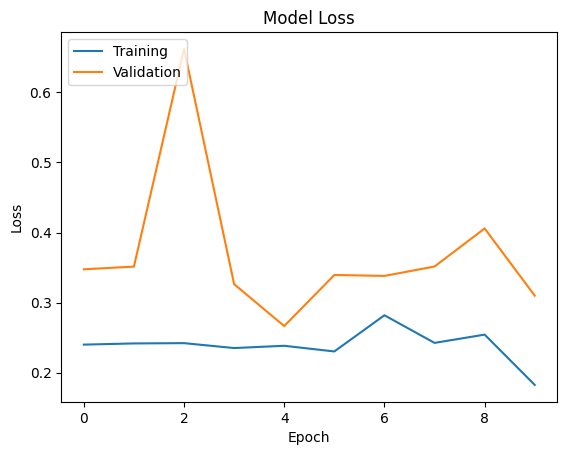

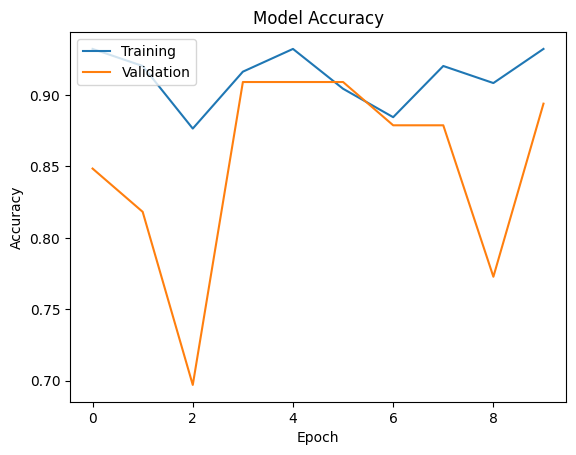

In [41]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()